In [139]:
using CSV
using DataFrames
using Plots
using Measures

In [108]:
df_mine_log = CSV.File("mine.csv") |> DataFrame
df_mine_log = df_mine_log[:, 2:end]

df_mine_rosbag_tf = CSV.File("mine_tf_rosbag.csv") |> DataFrame
df_mine_rosbag_tf = df_mine_rosbag_tf[:, 2:end]

df_mine_rosbag_cmd = CSV.File("mine_cmd_rosbag.csv") |> DataFrame
df_mine_rosbag_cmd = df_mine_rosbag_cmd[:, 2:end]
;


In [109]:
df_cbf_log = CSV.File("cbf.csv") |> DataFrame
df_cbf_log = df_cbf_log[:, 2:end]

df_cbf_rosbag_tf = CSV.File("cbf_tf_rosbag.csv") |> DataFrame
df_cbf_rosbag_tf = df_cbf_rosbag_tf[:, 2:end]

df_cbf_rosbag_cmd = CSV.File("cbf_cmd_rosbag.csv") |> DataFrame
df_cbf_rosbag_cmd = df_cbf_rosbag_cmd[:, 2:end]
;


In [110]:
df_no_barrier_log = CSV.File("no_barrier.csv") |> DataFrame
df_no_barrier_log = df_no_barrier_log[:, 2:end]

df_no_barrier_rosbag_tf = CSV.File("no_barrier_tf_rosbag.csv") |> DataFrame
df_no_barrier_rosbag_tf = df_no_barrier_rosbag_tf[:, 2:end]

df_no_barrier_rosbag_cmd = CSV.File("no_barrier_cmd_rosbag.csv") |> DataFrame
df_no_barrier_rosbag_cmd = df_no_barrier_rosbag_cmd[:, 2:end]
;


In [111]:
df_no_safety_log = CSV.File("no_safety.csv") |> DataFrame
df_no_safety_log = df_no_safety_log[:, 2:end]

df_no_safety_rosbag_tf = CSV.File("no_safety_tf_rosbag.csv") |> DataFrame
df_no_safety_rosbag_tf = df_no_safety_rosbag_tf[:, 2:end]

df_no_safety_rosbag_cmd = CSV.File("no_safety_cmd_rosbag.csv") |> DataFrame
df_no_safety_rosbag_cmd = df_no_safety_rosbag_cmd[:, 2:end]
;


In [163]:
function plot_barrier(; opacity=0.2)
    T = Float64
    p0 = T[-0.5,1,0]
    p1 = T[-0.5,-1,0]
    p2 = T[-0.5,-1,0.75]
    p3 = T[-0.5,1,0.75]
    pts = [p0, p1, p2, p3]
    x, y, z = broadcast(i -> getindex.(pts, i), (1,2,3))

    return plot(x, y, z, # [x[i],y[i],z[i]] is the i-th vertix of the mesh
        st=:mesh3d, 
        connections = [
            [1, 2, 3, 4]
        ], 
        linecolor = :black,
        fillcolor = :red,
        linewidth = 2,
        legend = true,
        label = false,
        fillalpha = opacity
    )
end

plot_barrier (generic function with 1 method)

In [174]:

function generate_anim(df_cmd, df_tf; opacity=0.2, fps=25)
    
    START_OFFSET = 2.5
    t_start = df_cmd[1, :cmd_ts] - START_OFFSET
    t_end = t_start + 15

    return @animate for t in t_start:(1/fps):t_end


        cmd_inds = findall(s->s>=t_start && s<=t, df_cmd[!, :cmd_ts])
        tf_inds = findall(s->s>=t_start && s<=t, df_tf[!, :tf_ts])

        p1 = plot_barrier(opacity=opacity)
        plot!(-df_cmd[cmd_inds, :cmd_xs], -df_cmd[cmd_inds, :cmd_ys], df_cmd[cmd_inds, :cmd_zs], label="Command", color=:black, linestyle=:dash)
        plot!(-df_tf[tf_inds, :tf_xs], -df_tf[tf_inds, :tf_ys], df_tf[tf_inds, :tf_zs], label="Measured", color=:blue)
        plot!(camera = (30, 60))
        xlims!(-1.0, 1.0)
        ylims!(-1.0, 1.0)
        zlims!(0.0, 0.75)

        p2 = plot()
        vline!([-0.5], color=:red, alpha=0.2, label=false)
        plot!(-df_cmd[cmd_inds, :cmd_xs], -df_cmd[cmd_inds, :cmd_ys], label="Command", color=:black, linestyle=:dash)
        plot!(-df_tf[tf_inds, :tf_xs], -df_tf[tf_inds, :tf_ys], label="Measured", color=:blue)
        xlims!(-1.0, 1.0)
        ylims!(-1.0, 1.0)
        xlabel!("x [m]")
        ylabel!("y [m]")

        plot(p1,p2,margin = 5mm)

    end every 1
    
end

generate_anim (generic function with 1 method)

┌ Info: Saved animation to 
│   fn = /home/dasclab/crazyswarm/crazyflie-firmware/tools/usdlog/flight_data/no_barrier_25fps.gif
└ @ Plots /home/dasclab/.julia/packages/Plots/8K4be/src/animation.jl:114


Plots.AnimatedGif("/home/dasclab/crazyswarm/crazyflie-firmware/tools/usdlog/flight_data/no_barrier_25fps.gif")
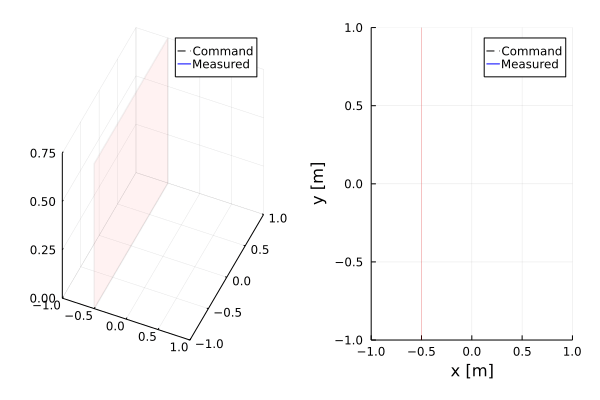

In [175]:
anim = generate_anim(df_no_barrier_rosbag_cmd, df_no_barrier_rosbag_tf; opacity=0.05)

gif(anim, "no_barrier_25fps.gif", fps=25)

┌ Info: Saved animation to 
│   fn = /home/dasclab/crazyswarm/crazyflie-firmware/tools/usdlog/flight_data/no_safety_25fps.gif
└ @ Plots /home/dasclab/.julia/packages/Plots/8K4be/src/animation.jl:114


Plots.AnimatedGif("/home/dasclab/crazyswarm/crazyflie-firmware/tools/usdlog/flight_data/no_safety_25fps.gif")
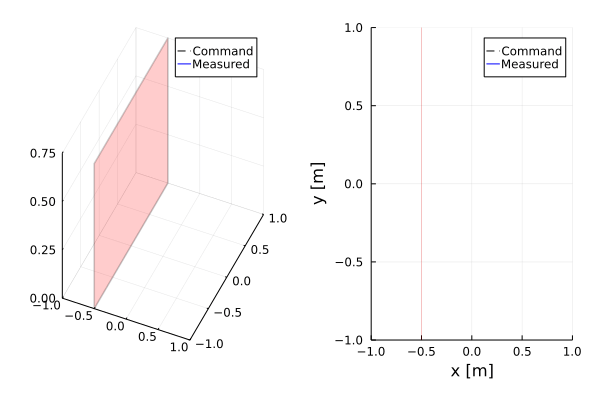

In [176]:
anim = generate_anim(df_no_safety_rosbag_cmd, df_no_safety_rosbag_tf)

gif(anim, "no_safety_25fps.gif", fps=25)

In [ ]:
anim = generate_anim(df_cbf_rosbag_cmd, df_cbf_rosbag_tf)

gif(anim, "cbf_25fps.gif", fps=25)

In [ ]:
anim = generate_anim(df_mine_rosbag_cmd, df_mine_rosbag_tf)

gif(anim, "mine_25fps.gif", fps=25)